---
<h1 style="text-align: center;">Modelagem de Redes Neurais para Previsão de Custos em Seguros de Saúde</h1>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 19/08/2024

---
---

# Introdução

As doenças cardiovasculares continuam sendo a principal causa de mortalidade no Brasil, de acordo com
o estudo Global Burden of Disease (GBD) de 2019 e os dados do Sistema Único de Saúde (SUS). O
preocupante aumento na incidência de ataques cardíacos entre jovens e adultos é amplamente atribuído
à falta de atividade física e a uma dieta inadequada. Esse panorama destaca a urgência de promover
hábitos de vida mais saudáveis, seguindo a recomendação de Michael Pollan: “descasque mais, desembale
menos”, que incentiva o consumo de alimentos frescos e não processados.

A deterioração da saúde pública tem impulsionado o crescimento do setor de planos de saúde. De
acordo com a Agência Nacional de Saúde Suplementar (ANS), o Brasil registrou um aumento de apro-
ximadamente 20,5 milhões de novos beneficiários de planos de assistência médica entre março de 2000 e
junho de 2024.

<p align="center">
  <span style="font-size: smaller;">Gráfico 01</span>
</p>
<p align="center">
  <img src="beneficiario_ans.png" alt="Gráfico mostrando o crescimento dos beneficiários de planos de saúde no Brasil" width="800"/>
</div>
</p>
<p align="center">
  <span style="font-size: smaller;">Fonte: Agência Nacional de Seguro (ANS)
  </span>
</p>

O gráfico acima ilustra o aumento no número de beneficiários ao longo de 24 anos, evidenciando
a crescente demanda por cuidados médicos. Esse crescimento torna essencial a análise e previsão das
despesas associadas aos seguros de saúde, objetivo principal deste projeto.
Para realizar esta análise, será utilizada uma base de dados disponível no [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data). A base contém
1.338 observações e 6 características, com o custo do seguro médico como variável alvo. A seguir, estão
as variáveis da base de dados:


| Atributo   | Descrição                                                      | Tipo                    |
|------------|----------------------------------------------------------------|-------------------------|
| Idade      | A idade da pessoa segurada.                                    | Inteiro                 |
| Sexo       | Gênero (masculino ou feminino) do segurado.                     | Categórico - Binário    |
| IMC        | Índice de Massa Corporal: uma medida de gordura corporal baseada na altura e no peso. | Contínuo                |
| Crianças   | O número de dependentes cobertos.                               | Inteiro                 |
| Fumante    | Se o segurado é fumante (sim ou não).                           | Categórico - Binário    |
| Região     | A área geográfica de cobertura.                                | Categórico - Nominal    |
| Encargos   | Os custos do seguro médico incorridos pelo segurado.            | Contínuo                |


# Fundamentos Teóricos e Metodológicos

O objetivo deste trabalho é prever os custos do seguro médico com base nas características dos clientes,
configurando-se como um problema de regressão. A abordagem tradicional de regressão linear pode ser
representada pela seguinte equação:

<p style="text-align: right;">
(1)
</p>

$$
\hat{y} = \beta_{0} + \beta_{1} \cdot x_{1} + \epsilon \hspace{3em} \text{(1)}
$$

Entretanto, as suposições subjacentes à regressão linear, como a normalidade das variáveis, a independência entre as características dos clientes e a normalidade dos resíduos, podem não ser atendidas neste contexto. Por essa razão, este estudo opta por utilizar redes neurais, especificamente o Perceptron Multicamadas (MLP), para realizar a previsão dos custos do seguro.

Modelos com múltiplas camadas, como o MLP, são mais adequados para resolver problemas complexos. Redes com $S \in \mathbb{N}$ neurônios são compostas por conjuntos de neurônios $O = \{o_1, o_2, \ldots, o_s\}$, vieses  $B = \{b_1, b_2, \ldots, b_s\}$, e pesos $W = \{w_{1,1}, w_{1,2}, \ldots, w_{1,k}, w_{2,1}, w_{2,2}, \ldots, w_{2,k}, \ldots, w_{j,k}\}$.


Copy code
<p align="center">
  <span style="font-size: smaller;">Gráfico 02</span>
</p>
<div style="text-align: center;">
    <img src="multicamadas_perceptron.png" alt="Arquitetura do Perceptron Multicamadas" width="400"/>
</div>  
<p align="center">
  <span style="font-size: smaller;">Fonte: <a href="https://www.researchgate.net/figure/Schematic-structure-of-a-perceptron-neural-network_fig2_260291992">https://www.researchgate.net/figure/Schematic-structure-of-a-perceptron-neural-network_fig2_260291992</a></span>
</p>

A entrada dos neurônios a partir da segunda camada oculta depende da saída dos neurônios da camada anterior. A função de ativação é dada por:


$$
\phi_i(net_j) = \phi_i\left(\sum_{k=1}^{n} w_{k,j} \cdot o_k + b_j\right)
$$

onde

$$
net_j = \sum_{k=1}^{n} w_{k,j} \cdot o_k + b_j
$$





Este crescimento reflete a crescente demanda por cuidados médicos, tornando crucial a análise e previsão das despesas associadas aos seguros de saúde, que é o foco deste projeto de aprendizado de máquina.

## Bibliotecas Utilizadas

In [2]:
# Configurando o modo de exibição do pandas
import pandas as pd

pd.options.display.float_format = "{:.4f}".format

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense, Dropout

# Desativa todos os avisos
import warnings

warnings.filterwarnings("ignore")

/home/gabrieldadcarvalho/miniconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-29 16:50:41.305934: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Coleta dos Dados

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/main/projeto/insurance.csv")


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Exploração dos Dados

A análise exploratória foi essencial para entender os padrões de custo de seguro entre diferentes perfis de
indivíduos, antes de ajustar qualquer modelo. Este processo permitiu identificar grupos com custos de
seguro elevados ou baixos, oferecendo insights valiosos sobre os fatores que influenciam essas despesas.
Além disso, a análise ajudou a investigar a correlação entre variáveis, facilitando a aplicação de trans-
formações apropriadas nos dados para melhorar o ajuste do modelo de regressão que será desenvolvido
posteriormente.

In [4]:
# Gerar um relatório de análise exploratória
report = sv.analyze(df)

# Salvar o relatório em HTML
report.show_html("insurance_analysis_report.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report insurance_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   imc       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoke     1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df[df.duplicated()]

,age,sex,imc,children,smoke,region,charges
581,19,male,30.5900,0,no,northwest,1639.5631


In [12]:
df.describe()

,age,imc,children,charges
count,1338.0000,1338.0000,1338.0000,1338.0000
mean,39.2070,30.6634,1.0949,13270.4223
std,14.0500,6.0982,1.2055,12110.0112
min,18.0000,15.9600,0.0000,1121.8739
25%,27.0000,26.2963,0.0000,4740.2872
50%,39.0000,30.4000,1.0000,9382.0330
75%,51.0000,34.6938,2.0000,16639.9125
max,64.0000,53.1300,5.0000,63770.4280


In [36]:
print('MODAS:')
df[['age', 'imc', 'children', 'charges']].mode()

MODAS:


,age,imc,children,charges
0,18,32.3000,0,1639.5631


In [16]:
df.describe(include='object')

,sex,smoke,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


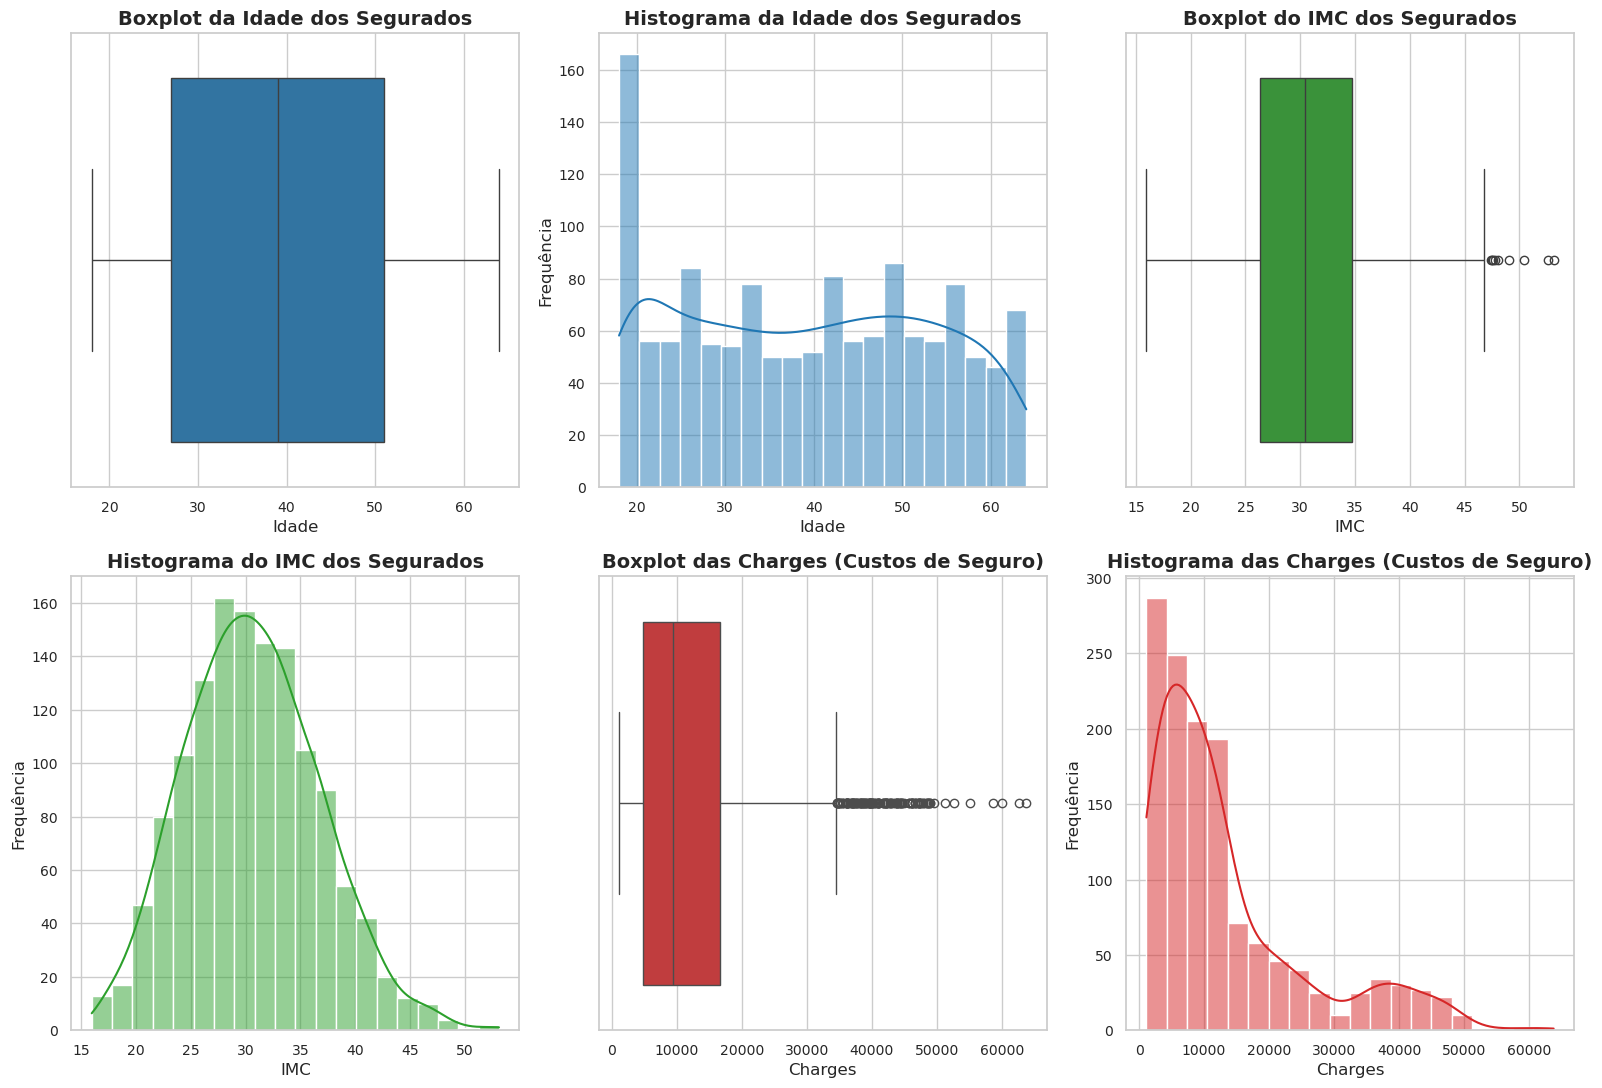

In [23]:
# Tamanho da figura
plt.figure(figsize=(16, 16))

# Cores vibrantes
color_age = '#1f77b4'  # Azul vibrante
color_imc = '#2ca02c'  # Verde vibrante
color_charges = '#d62728'  # Vermelho vibrante
color_children = '#ff7f0e'  # Laranja vibrante

# Boxplot e Histograma para a variável 'age'
plt.subplot(3, 3, 1)
sns.boxplot(x=df['age'], color=color_age)
plt.title('Boxplot da Idade dos Segurados', fontsize=14, fontweight='bold')
plt.xlabel('Idade', fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(3, 3, 2)
sns.histplot(df['age'], bins=20, kde=True, color=color_age)
plt.title('Histograma da Idade dos Segurados', fontsize=14, fontweight='bold')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Boxplot e Histograma para a variável 'imc'
plt.subplot(3, 3, 3)
sns.boxplot(x=df['imc'], color=color_imc)
plt.title('Boxplot do IMC dos Segurados', fontsize=14, fontweight='bold')
plt.xlabel('IMC', fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(3, 3, 4)
sns.histplot(df['imc'], bins=20, kde=True, color=color_imc)
plt.title('Histograma do IMC dos Segurados', fontsize=14, fontweight='bold')
plt.xlabel('IMC', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Boxplot e Histograma para a variável 'charges'
plt.subplot(3, 3, 5)
sns.boxplot(x=df['charges'], color=color_charges)
plt.title('Boxplot das Charges (Custos de Seguro)', fontsize=14, fontweight='bold')
plt.xlabel('Charges', fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(3, 3, 6)
sns.histplot(df['charges'], bins=20, kde=True, color=color_charges)
plt.title('Histograma das Charges (Custos de Seguro)', fontsize=14, fontweight='bold')
plt.xlabel('Charges', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()

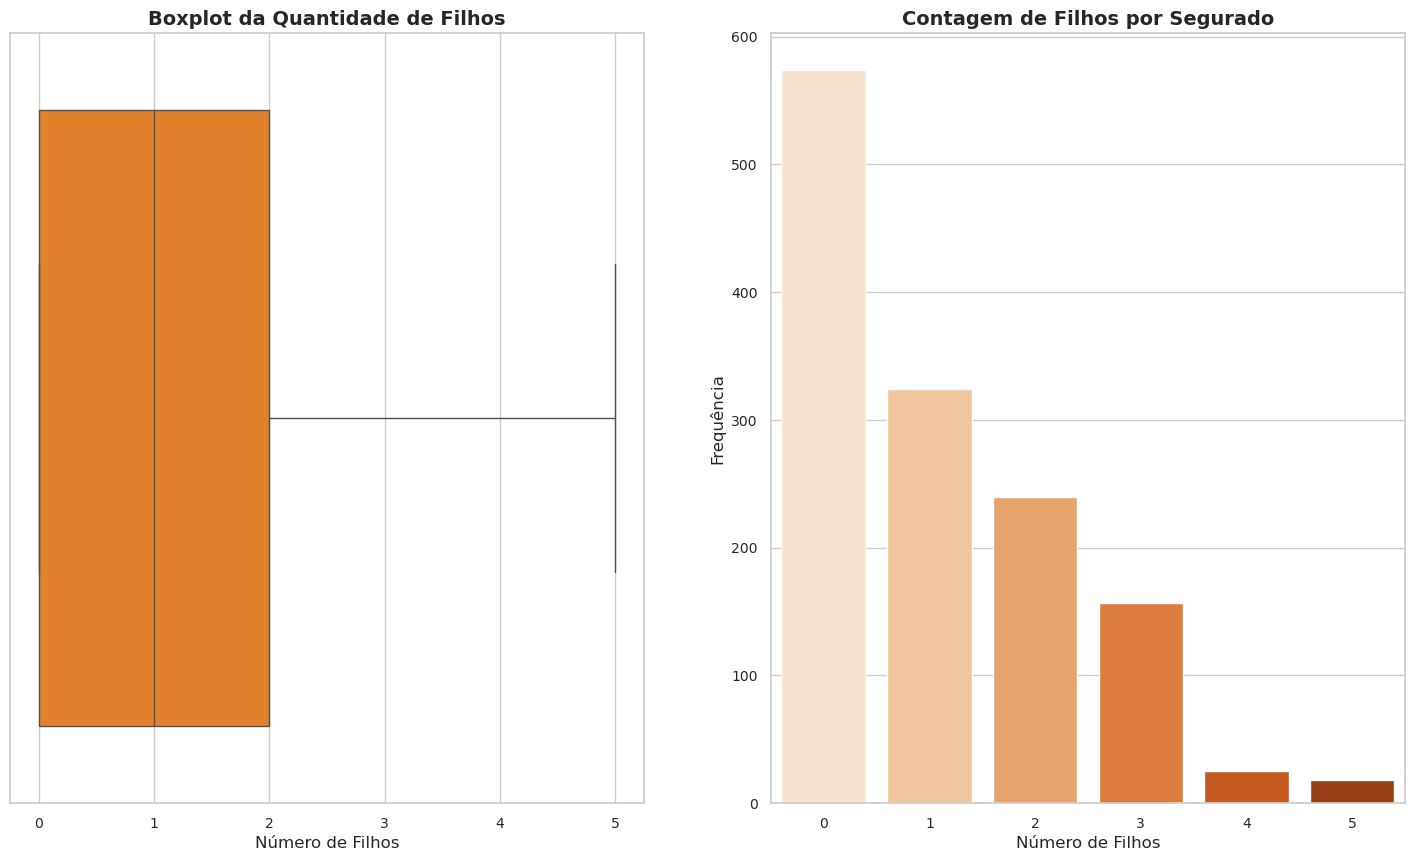

In [25]:
# Tamanho da figura
plt.figure(figsize=(18, 10))

# Boxplot e Gráfico de Barras para a variável 'children'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['children'], color=color_children)
plt.title('Boxplot da Quantidade de Filhos', fontsize=14, fontweight='bold')
plt.xlabel('Número de Filhos', fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(1, 2, 2)
sns.countplot(x=df['children'], palette='Oranges')  # Gráfico de barras para variável discreta
plt.title('Contagem de Filhos por Segurado', fontsize=14, fontweight='bold')
plt.xlabel('Número de Filhos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

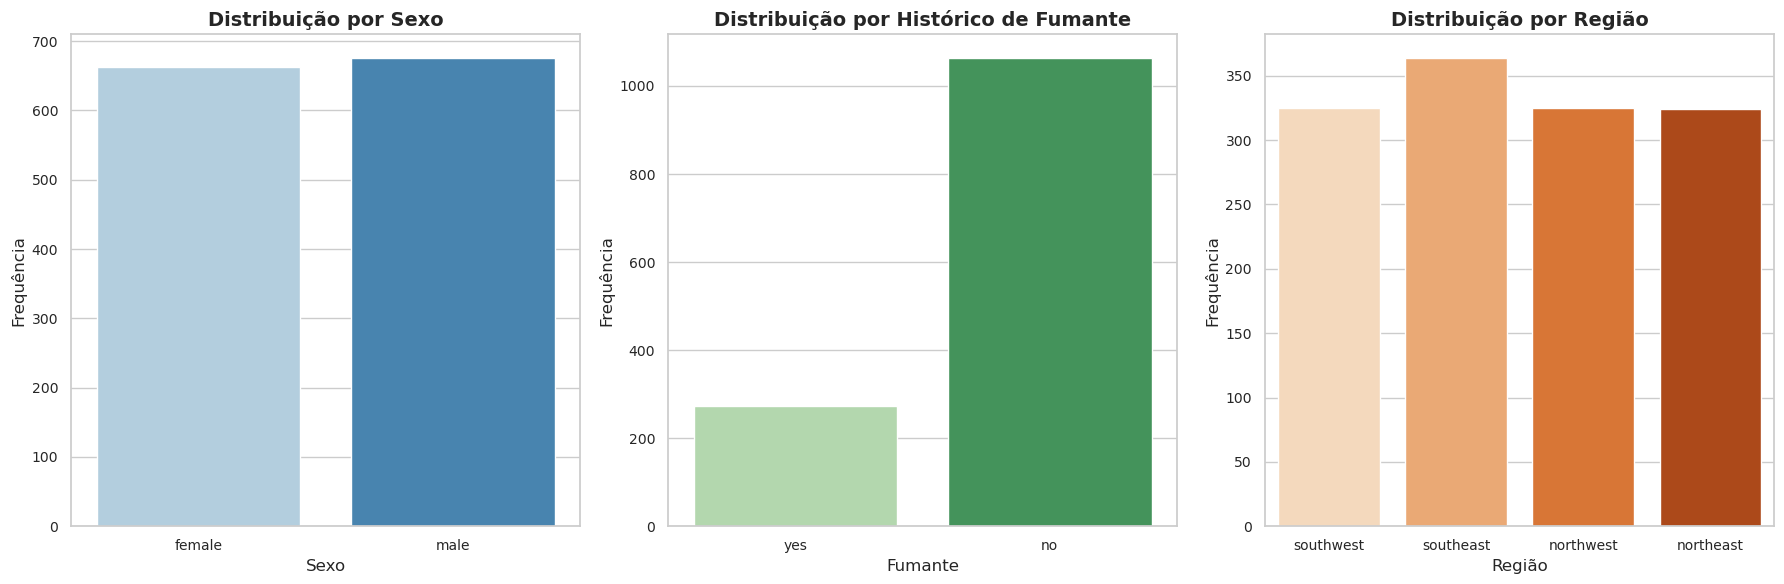

In [15]:
# Tamanho da figura
plt.figure(figsize=(18, 6))

# Gráfico de barras para a variável 'sex'
plt.subplot(1, 3, 1)
sns.countplot(x=df['sex'], palette='Blues')
plt.title('Distribuição por Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Gráfico de barras para a variável 'smoke'
plt.subplot(1, 3, 2)
sns.countplot(x=df['smoke'], palette='Greens')
plt.title('Distribuição por Histórico de Fumante', fontsize=14, fontweight='bold')
plt.xlabel('Fumante', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Gráfico de barras para a variável 'region'
plt.subplot(1, 3, 3)
sns.countplot(x=df['region'], palette='Oranges')
plt.title('Distribuição por Região', fontsize=14, fontweight='bold')
plt.xlabel('Região', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()

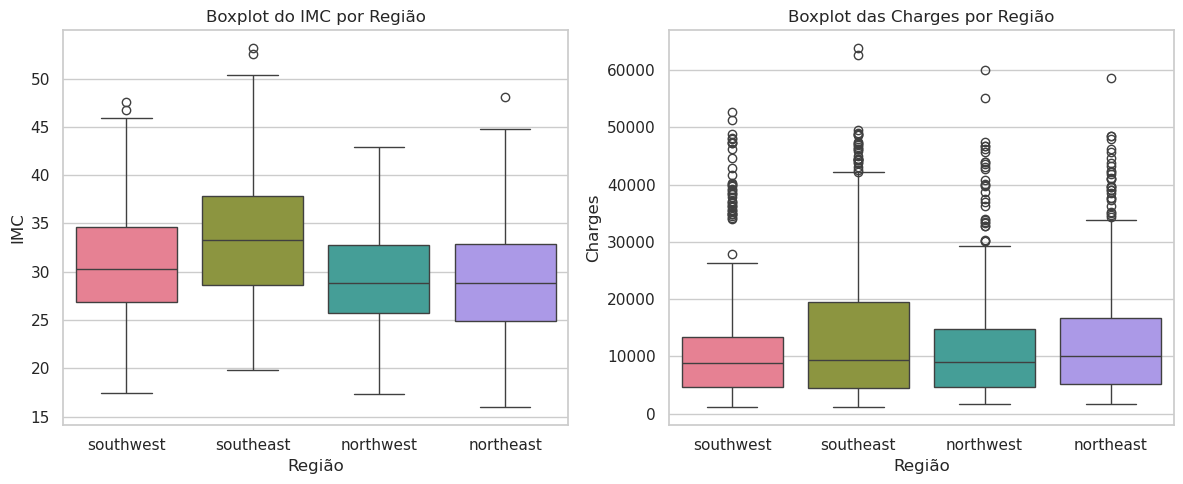

In [5]:
# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando o boxplot do IMC por região
plt.figure(figsize=(12, 5))

# Definindo uma paleta de cores
palette = sns.color_palette("husl", len(df['region'].unique()))

plt.subplot(1, 2, 1)
sns.boxplot(x='region', y='imc', data=df, palette=palette)
plt.title('Boxplot do IMC por Região')
plt.ylabel('IMC')
plt.xlabel('Região')

# Criando o boxplot das Charges por região
plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='charges', data=df, palette=palette)
plt.title('Boxplot das Charges por Região')
plt.ylabel('Charges')
plt.xlabel('Região')

# Ajustar layout
plt.tight_layout()
plt.show()

In [12]:
df['age'].max()

64

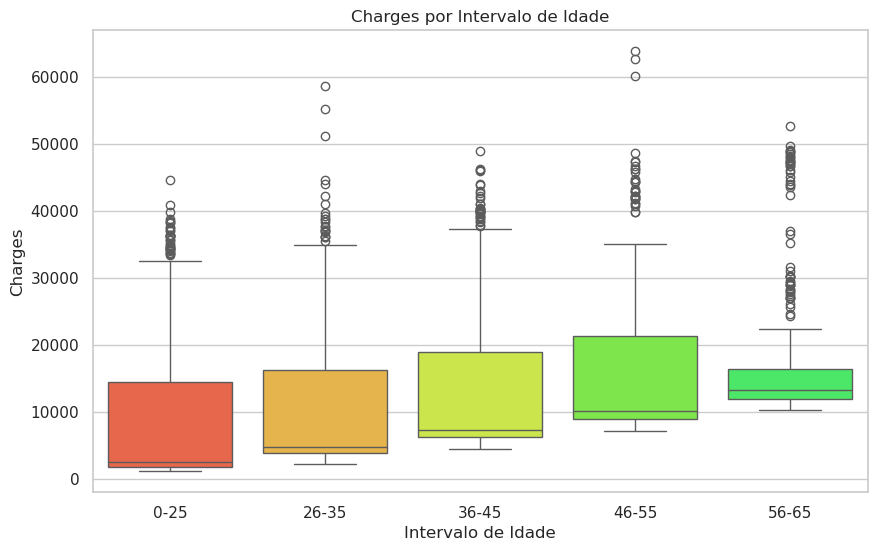

In [15]:
# Dividindo idade em intervalos
bins = [0, 25, 35, 45, 55, 65]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Definindo cores mais fortes para cada grupo etário
colors = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57', '#3357FF']

# Criando o boxplot com cores mais fortes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='charges', palette=colors)
plt.title('Charges por Intervalo de Idade')
plt.xlabel('Intervalo de Idade')
plt.ylabel('Charges')
plt.show()

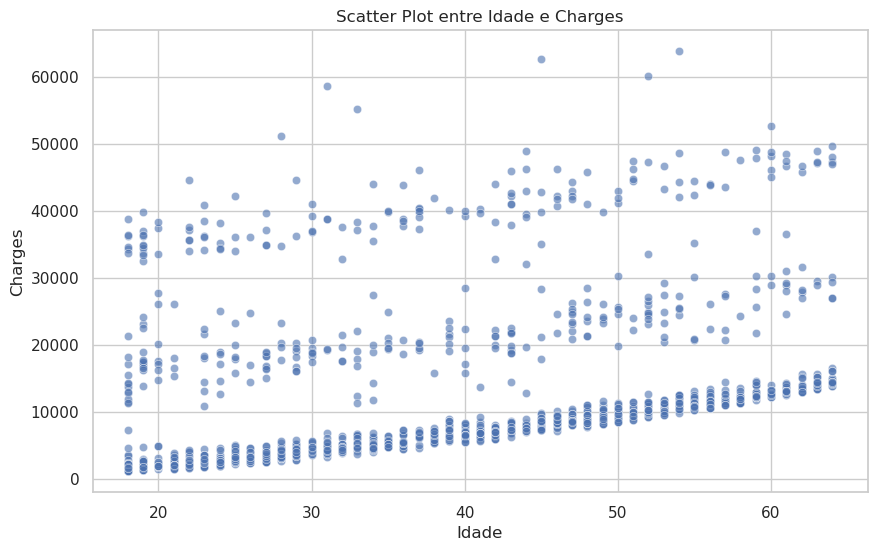

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6)
plt.title('Scatter Plot entre Idade e Charges')
plt.xlabel('Idade')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

## Teste T



In [506]:
idade_m = X[X['sex'] == 'male']['age']
idade_f = X[X['sex'] == 'female']['age']
t = (idade_m.mean() - idade_f.mean()) / np.sqrt((idade_m.var(ddof=1)/len(idade_m) + idade_f.var(ddof=1) / len(idade_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(idade_m)+len(idade_f)-2)
t_crit

t-statistic: -0.7624734701767805


1.9617412190546957

In [507]:
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(idade_m)+len(idade_f)-2)
t_crit

1.9617412190546957

In [508]:
imc_m = X[X['sex'] == 'male']['imc']
imc_f = X[X['sex'] == 'female']['imc']
t = (imc_m.mean() - imc_f.mean()) / np.sqrt((imc_m.var(ddof=1)/len(imc_m) + imc_f.var(ddof=1) / len(imc_f)))
print(f"t-statistic: {t}")

t-statistic: 1.697027933124022


In [509]:
idade_s_y = X[X['smoke'] == 'yes']['age']
idade_s_n = X[X['smoke'] == 'no']['age']
t = (idade_s_y.mean() - idade_s_n.mean()) / np.sqrt((idade_s_y.var(ddof=1)/len(idade_s_y) + idade_s_n.var(ddof=1) / len(idade_s_n)))
print(f"t-statistic: {t}")

t-statistic: -0.9209603068505062


In [510]:
imc_s_y = X[X['smoke'] == 'yes']['imc']
imc_s_n = X[X['smoke'] == 'no']['imc']
t = (imc_s_y.mean() - imc_s_n.mean()) / np.sqrt((imc_s_y.var(ddof=1)/len(imc_s_y) + imc_s_n.var(ddof=1) / len(imc_s_n)))
print(f"t-statistic: {t}")

t-statistic: 0.1335212194724234


## Teste ANOVA

In [511]:
from scipy.stats import f
age_se = np.array(X[X['region'] == 'southeast']['age'])
age_sw = np.array(X[X['region'] == 'southwest']['age'])
age_ne = np.array(X[X['region'] == 'northwest']['age'])
age_bw = np.array(X[X['region'] == 'northeast']['age'])

mean_se = np.mean(age_se)
mean_sw = np.mean(age_sw)
mean_ne = np.mean(age_ne)
mean_bw = np.mean(age_bw)

all_a_r = np.concatenate([age_se, age_sw, age_ne, age_bw])
mean_all = np.mean(all_a_r)

k = 4
N = len(all_a_r)


QT = np.sum((all_a_r - mean_all) ** 2)

QG = len(age_se) * (mean_se - mean_all) ** 2 + \
     len(age_sw) * (mean_sw - mean_all) ** 2 + \
     len(age_ne) * (mean_ne - mean_all) ** 2 + \
     len(age_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((age_se - mean_se) ** 2) + \
     np.sum((age_sw - mean_sw) ** 2) + \
     np.sum((age_ne - mean_ne) ** 2) + \
     np.sum((age_bw - mean_bw) ** 2)

df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 0.07978158162436415
Valor Crítico F: 2.611573218649548
Não rejeitamos a hipótese nula.


In [512]:
age_c0 = np.array(X[X['children'] == 0]['age'])
age_c1 = np.array(X[X['children'] == 1]['age'])
age_c2 = np.array(X[X['children'] == 2]['age'])
age_c3 = np.array(X[X['children'] == 3]['age'])
age_c4 = np.array(X[X['children'] == 4]['age'])
age_c5 = np.array(X[X['children'] ==  5]['age'])

mean_c0 = np.mean(age_c0)
mean_c1 = np.mean(age_c1)
mean_c2 = np.mean(age_c2)
mean_c3 = np.mean(age_c3)
mean_c4 = np.mean(age_c4)
mean_c5 = np.mean(age_c5)

all_a_c = np.concatenate([age_c0, age_c1, age_c2, age_c3, age_c4, age_c5])
mean_all = np.mean(all_a_c)

k = 6
N = len(all_a_c)


QG = len(age_c0) * (mean_c0 - mean_all) ** 2 + \
     len(age_c1) * (mean_c1 - mean_all) ** 2 + \
     len(age_c2) * (mean_c2 - mean_all) ** 2 + \
     len(age_c3) * (mean_c3 - mean_all) ** 2 + \
     len(age_c4) * (mean_c4 - mean_all) ** 2 + \
     len(age_c5) * (mean_c5 - mean_all) ** 2

QD = np.sum((age_c0 - mean_c0) ** 2) + \
     np.sum((age_c1 - mean_c1) ** 2) + \
     np.sum((age_c2 - mean_c2) ** 2) + \
     np.sum((age_c3 - mean_c3) ** 2) + \
     np.sum((age_c4 - mean_c4) ** 2) + \
     np.sum((age_c5 - mean_c5) ** 2)


df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 1.497717337339237
Valor Crítico F: 2.220817484845099
Não rejeitamos a hipótese nula.


In [513]:
# Dados
imc_se = np.array(X[X['region'] == 'southeast']['imc'])
imc_sw = np.array(X[X['region'] == 'southwest']['imc'])
imc_ne = np.array(X[X['region'] == 'northwest']['imc'])
imc_bw = np.array(X[X['region'] == 'northeast']['imc'])

# Cálculo das médias dos grupos
mean_se = np.mean(imc_se)
mean_sw = np.mean(imc_sw)
mean_ne = np.mean(imc_ne)
mean_bw = np.mean(imc_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([imc_se, imc_sw, imc_ne, imc_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(imc_se) * (mean_se - mean_all) ** 2 + \
     len(imc_sw) * (mean_sw - mean_all) ** 2 + \
     len(imc_ne) * (mean_ne - mean_all) ** 2 + \
     len(imc_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((imc_se - mean_se) ** 2) + \
     np.sum((imc_sw - mean_sw) ** 2) + \
     np.sum((imc_ne - mean_ne) ** 2) + \
     np.sum((imc_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 39.49505720170287
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [514]:
print(df_between)
print(df_within)

3
1334


In [515]:
# Dados
imc_se = np.array(X[X['region'] == 'southeast']['imc'])
imc_sw = np.array(X[X['region'] == 'southwest']['imc'])
imc_ne = np.array(X[X['region'] == 'northwest']['imc'])
imc_bw = np.array(X[X['region'] == 'northeast']['imc'])

# Cálculo das médias dos grupos
mean_se = np.mean(imc_se)
mean_sw = np.mean(imc_sw)
mean_ne = np.mean(imc_ne)
mean_bw = np.mean(imc_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([imc_se, imc_sw, imc_ne, imc_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(imc_se) * (mean_se - mean_all) ** 2 + \
     len(imc_sw) * (mean_sw - mean_all) ** 2 + \
     len(imc_ne) * (mean_ne - mean_all) ** 2 + \
     len(imc_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((imc_se - mean_se) ** 2) + \
     np.sum((imc_sw - mean_sw) ** 2) + \
     np.sum((imc_ne - mean_ne) ** 2) + \
     np.sum((imc_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 39.49505720170287
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [516]:
from scipy.stats import f
children_se = np.array(X[X['region'] == 'southeast']['children'])
children_sw = np.array(X[X['region'] == 'southwest']['children'])
children_ne = np.array(X[X['region'] == 'northwest']['children'])
children_bw = np.array(X[X['region'] == 'northeast']['children'])

mean_se = np.mean(children_se)
mean_sw = np.mean(children_sw)
mean_ne = np.mean(children_ne)
mean_bw = np.mean(children_bw)

all_c_r = np.concatenate([children_se, children_sw, children_ne, children_bw])
mean_all = np.mean(all_c_r)

k = 4
N = len(all_c_r)


QT = np.sum((all_c_r - mean_all) ** 2)

QG = len(children_se) * (mean_se - mean_all) ** 2 + \
     len(children_sw) * (mean_sw - mean_all) ** 2 + \
     len(children_ne) * (mean_ne - mean_all) ** 2 + \
     len(children_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((children_se - mean_se) ** 2) + \
     np.sum((children_sw - mean_sw) ** 2) + \
     np.sum((children_ne - mean_ne) ** 2) + \
     np.sum((children_bw - mean_bw) ** 2)

df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 0.7174932934640633
Valor Crítico F: 2.611573218649548
Não rejeitamos a hipótese nula.


In [517]:
print(df_between)
print(df_within)

3
1334


In [518]:
custo_m = y[X['sex'] == 'male']
custo_f = y[X['sex'] == 'female']
t = (custo_m.mean() - custo_f.mean()) / np.sqrt((custo_m.var(ddof=1)/len(custo_m) + custo_f.var(ddof=1) / len(custo_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_m)+len(custo_f)-2)
t_crit

t-statistic: 2.1008878232359565


1.9617412190546957

## Teste T

In [519]:
custo_m = y[X['sex'] == 'male']
custo_f = y[X['sex'] == 'female']
t = (custo_m.mean() - custo_f.mean()) / np.sqrt((custo_m.var(ddof=1)/len(custo_m) + custo_f.var(ddof=1) / len(custo_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_m)+len(custo_f)-2)
t_crit

t-statistic: 2.1008878232359565


1.9617412190546957

In [520]:
custo_s_y = y[X['smoke'] == 'yes']
custo_s_n = y[X['smoke'] == 'no']
t = (custo_s_y.mean() - custo_s_n.mean()) / np.sqrt((custo_s_y.var(ddof=1)/len(custo_s_y) + custo_s_n.var(ddof=1) / len(custo_s_n)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_s_y)+len(custo_s_n)-2)
t_crit

t-statistic: 32.751887766341824


1.9617412190546957

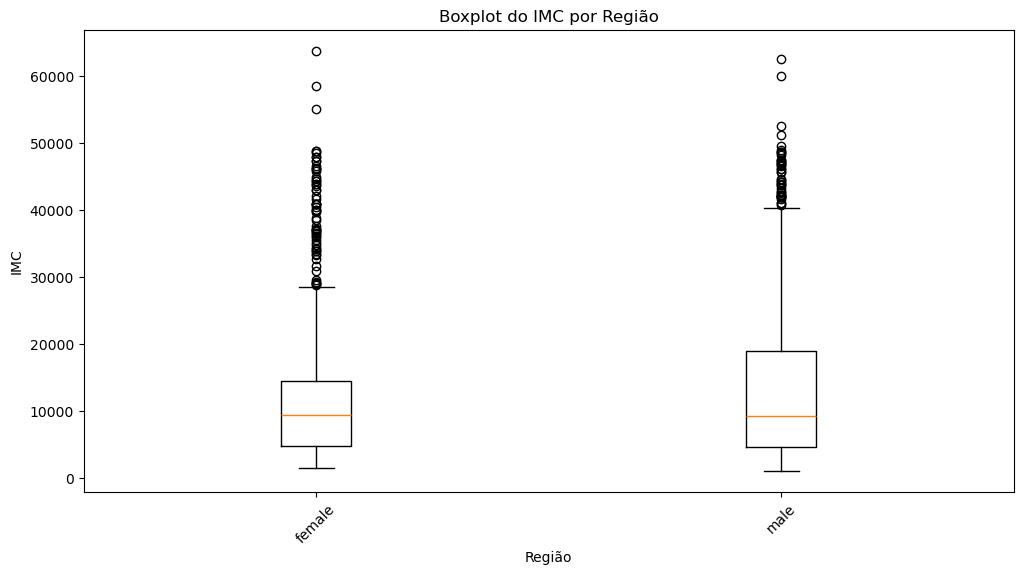

In [521]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['sex'] == region]for region in X['sex'].unique()],
            labels=X['sex'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

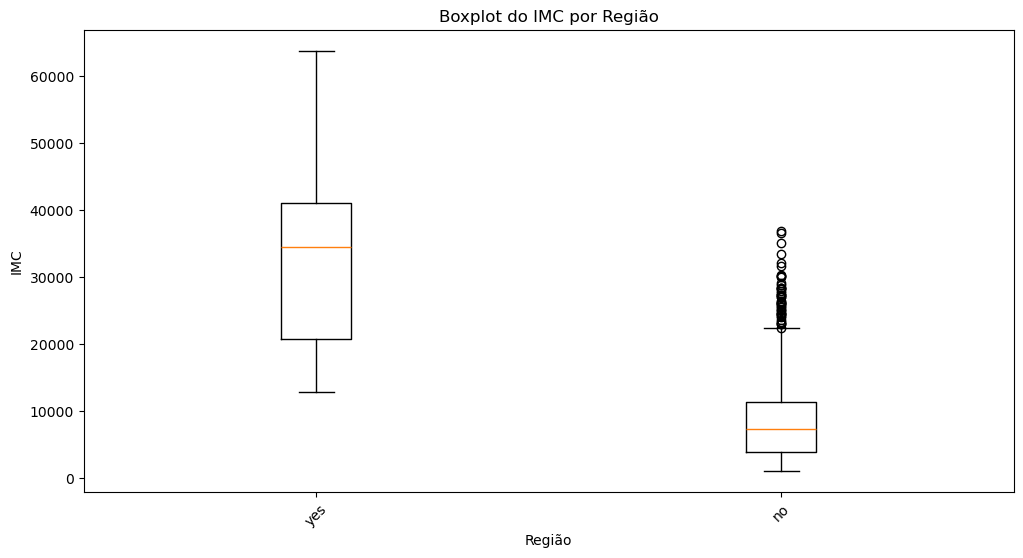

In [522]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['smoke'] == region]for region in X['smoke'].unique()],
            labels=X['smoke'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

## Correlação de Person

In [523]:
correlation = X[['age', 'imc']].corrwith(y)
correlation

age   0.2990
imc   0.1983
dtype: float64

In [524]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(X['age'], y)

print('Correlação de Spearman:', correlation)
print('Valor-p:', p_value)

Correlação de Spearman: 0.5343921337718459
Valor-p: 1.130692027803638e-99


In [525]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(X['imc'], y)

print('Correlação de Spearman:', correlation)
print('Valor-p:', p_value)

Correlação de Spearman: 0.11939590358331145
Valor-p: 1.1926059544526874e-05


In [526]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(X['age'], y)

print('Correlação de Spearman:', correlation)
print('Valor-p:', p_value)

Correlação de Spearman: 0.5343921337718459
Valor-p: 1.130692027803638e-99


In [527]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(X['children'], y)

print('Correlação de Spearman:', correlation)
print('Valor-p:', p_value)

Correlação de Spearman: 0.13333894319168216
Valor-p: 9.846806132997298e-07


## Teste ANOVA

In [528]:
# Dados
y_se = np.array(y[X['region'] == 'southeast'])
y_sw = np.array(y[X['region'] == 'southwest'])
y_ne = np.array(y[X['region'] == 'northwest'])
y_bw = np.array(y[X['region'] == 'northeast'])

# Cálculo das médias dos grupos
mean_se = np.mean(y_se)
mean_sw = np.mean(y_sw)
mean_ne = np.mean(y_ne)
mean_bw = np.mean(y_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([y_se, y_sw, y_ne, y_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(y_se) * (mean_se - mean_all) ** 2 + \
     len(y_sw) * (mean_sw - mean_all) ** 2 + \
     len(y_ne) * (mean_ne - mean_all) ** 2 + \
     len(y_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((y_se - mean_se) ** 2) + \
     np.sum((y_sw - mean_sw) ** 2) + \
     np.sum((y_ne - mean_ne) ** 2) + \
     np.sum((y_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 2.969626693589115
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


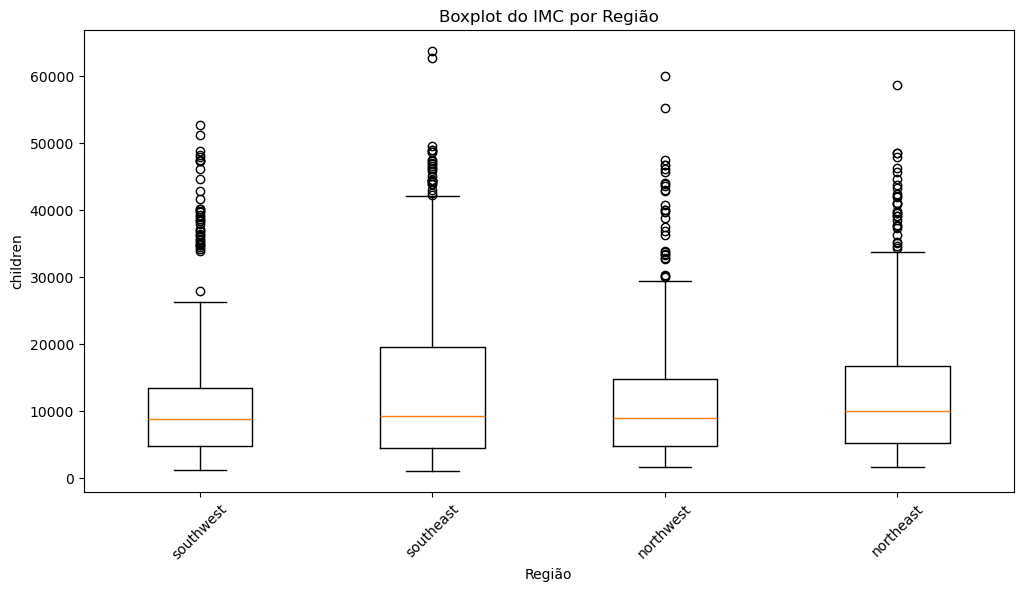

In [529]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['region'] == region]for region in X['region'].unique()],
            labels=X['region'].unique())
plt.xlabel('Região')
plt.ylabel('children')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

# Transformação variáveis

## Removendo outliers

In [530]:
# # Passo 2: Calcular o IQR para y
# Q1 = y.quantile(0.25)
# Q3 = y.quantile(0.75)
# IQR = Q3 - Q1

# # Passo 3: Definir limites
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Passo 4: Remover outliers de y e as observações correspondentes de X
# # Criar um filtro booleano para y
# outlier_filter = (y >= lower_bound) & (y <= upper_bound)

# # Aplicar o filtro em X e y
# X_t = X[outlier_filter]
# y_t = y[outlier_filter]

## Padronizando variáveis

In [531]:
X_t = pd.get_dummies(X, columns=['sex', 'smoke', 'region'])

X_t['age'] = (X_t['age'] - X_t['age'].min()) / (X_t['age'].max() - X_t['age'].min())

X_t['imc'] = (X_t['imc'] - X_t['imc'].min()) / (X_t['imc'].max() - X_t['imc'].min())

# Salva estatísticas de y
y_dic = {'max': y.max(), 'min': y.min()}

# Alternativa: Normalização (Min-Max) se desejar
y_t = (y - y.min()) / (y.max() - y.min())

# Modelo

In [532]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [533]:
# Métrica RMSE
def rmse(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [534]:
def modelo_r():
    modelo = models.Sequential()
    modelo.add(Dense(128, activation="relu", input_shape=(X_t.shape[1],)))
    modelo.add(Dropout(0.1))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dropout(0.1))
    modelo.add(Dense(800, activation="relu"))
    modelo.add(Dropout(0.1))
    modelo.add(Dense(256, activation="relu"))
    modelo.add(Dense(1, activation = 'linear'))
    modelo.compile(optimizer="adam", loss="mse", metrics=[rmse])
    
    return modelo

In [535]:
modelo = modelo_r()

In [543]:
hist = modelo.fit(X_train, y_train, epochs=10000, validation_split=0.2)

Epoch 1/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.8444e-04 - rmse: 0.0176 - val_loss: 0.0093 - val_rmse: 0.0953
Epoch 2/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.7908e-04 - rmse: 0.0206 - val_loss: 0.0087 - val_rmse: 0.0929
Epoch 3/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9148e-04 - rmse: 0.0272 - val_loss: 0.0090 - val_rmse: 0.0941
Epoch 4/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1808e-04 - rmse: 0.0208 - val_loss: 0.0088 - val_rmse: 0.0930
Epoch 5/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4922e-04 - rmse: 0.0186 - val_loss: 0.0081 - val_rmse: 0.0896
Epoch 6/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4118e-04 - rmse: 0.0166 - val_loss: 0.0088 - val_rmse: 0.0932
Epoch 7/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1325e-04 - rmse: 0.0177 - val_loss: 0.0086 - val_rmse: 0.0916
Epoch 8/10000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0639e-04 - rmse: 0.0190 - val_loss: 0.0090 - val_rmse: 0.0

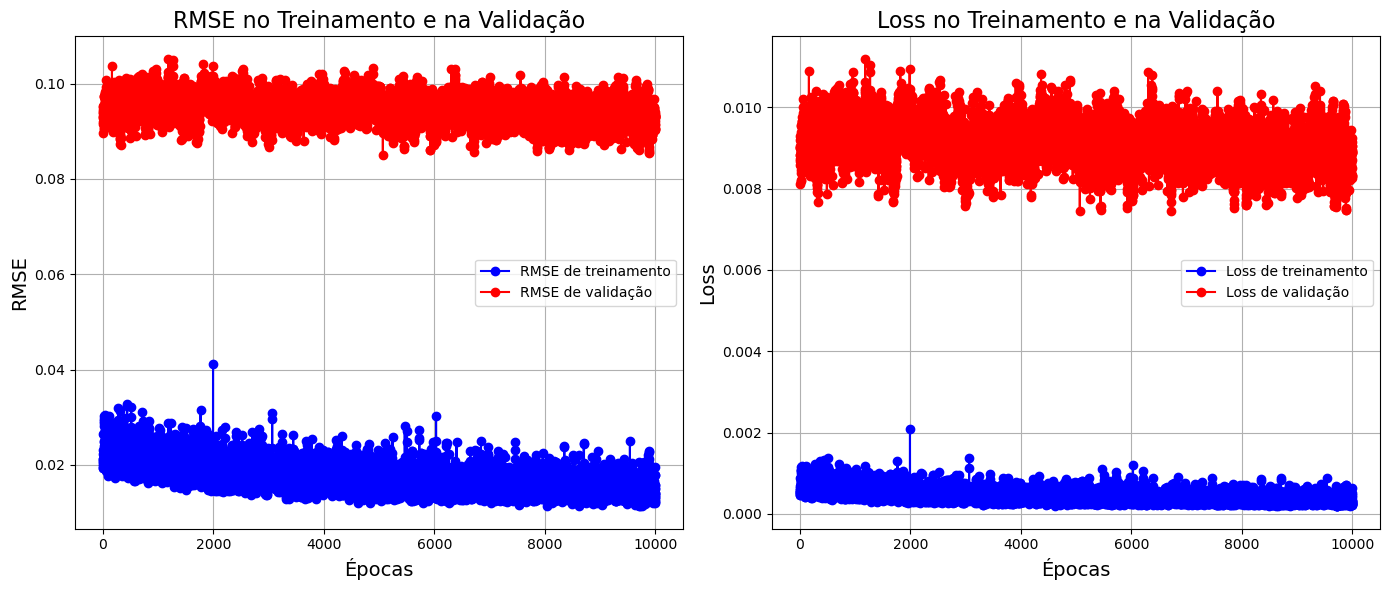

In [544]:
import seaborn as sns 
loss = hist.history['loss']
val_loss = hist.history['val_loss']
rmse = hist.history['rmse']
val_rmse = hist.history['val_rmse']
epochs = range(1, len(loss) + 1)

# Plot da RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, rmse, 'o-', color='blue', label='RMSE de treinamento')
plt.plot(epochs, val_rmse, 'o-', color='red', label='RMSE de validação')
plt.title('RMSE no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()
plt.grid(True)

# Plot da perda
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'o-', color='blue', label='Loss de treinamento')
plt.plot(epochs, val_loss, 'o-', color='red', label='Loss de validação')
plt.title('Loss no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [545]:
# Predição e visualização
predictions = modelo.predict(X_test)

# Colocar valores reais e preditos em um DataFrame
results_df = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': predictions.flatten()})

# Exibir o DataFrame
print(results_df.head())

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
      Valor Real  Valor Predito
764       0.1273         0.1411
887       0.0662         0.0607
890       0.4503         0.4310
1293      0.1306         0.1376
259       0.5208         0.2586


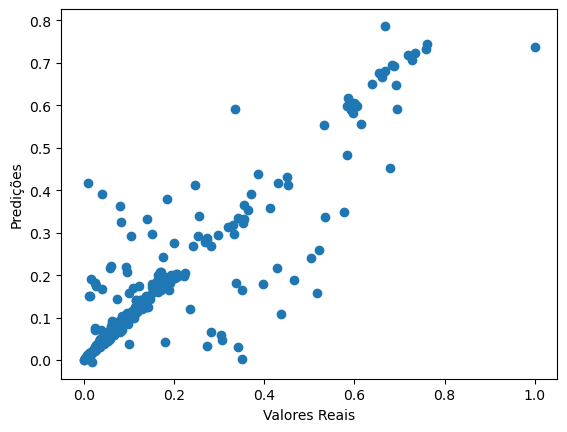

In [546]:
# Plotar previsões vs valores reais
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.show()

In [547]:
def r_trans(y, max, min):
  return (y * (max - min) + min)

In [548]:
# Colocar valores reais e preditos em um DataFrame
results_df = pd.DataFrame({'Valor Real': r_trans(y_test, y_dic['max'], y_dic['min']), 'Valor Predito': r_trans(predictions, y_dic['max'], y_dic['min']).flatten()})

# Exibir o DataFrame
print(results_df.head())

      Valor Real  Valor Predito
764    9095.0682      9958.8086
887    5272.1758      4924.0317
890   29330.9832     28125.7969
1293   9301.8935      9739.5205
259   33750.2918     17325.6309


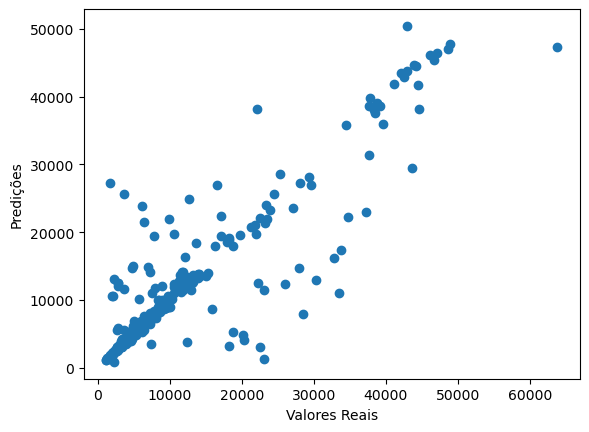

In [549]:
# Plotar previsões vs valores reais
plt.scatter(r_trans(y_test, y_dic['max'], y_dic['min']),r_trans(predictions, y_dic['max'], y_dic['min']))
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.show()